In [2]:
# 공통 처리

# 불필요한 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 한글 글꼴 설정
import platform

if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin':
    plt.rc('font', family='Apple Gothic')

# 데이터프레임 출력용 함수
from IPython.display import display

# 숫자 출력 조정
# 넘파이 부동소수점 출력 자리수 설정
np.set_printoptions(suppress=True, precision=4)

# 판다스 부동소수점 출력 자리수 설정
pd.options.display.float_format = '{:.4f}'.format

# 데이터프레임 모든 필드 출력
pd.set_option("display.max_columns",None)

# 그래프 글꼴 크기 설정
plt.rcParams["font.size"] = 14

# 난수 시드
random_seed = 123

#### 데이터 로드

In [3]:
# 유방암 데이터 집합 읽어 들이기

# 라이브러리 임포트
from sklearn.datasets import load_breast_cancer

# 데이터 내려받기
cancer = load_breast_cancer()

# 데이터에 대한 설명 읽기
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [4]:
# 데이터프레임으로 변환하기

columns = [
    '반지름_평균', '텍스처_평균', '둘레길이_평균', '면적_평균',
    '평활도_평균', '콤팩트도_평균', '오목면_평균',
    '오목점_평균', '대칭성_평균', '프랙탈도_평균',
    '반지름_표준편차', '텍스처_표준편차', '둘레길이_표준편차',
    '면적_표준편차', '평활도_표준편차',
    '콤팩트도_표준편차', '오목면_표준편차', '오목점_표준편차',
    '대칭성_표준편차', '프랙탈도_표준편차',
    '반지름_최대', '텍스처_최대', '둘레길이_최대', '면적_최대',
    '평활도_최대', '콤팩트도_최대', '오목면_최대', '오목점_최대',
    '대칭성_최대', '프랙탈도_최대'
]

# 읽어 들인 데이터를 데이터프레임으로 변환
df = pd.DataFrame(cancer.data, columns=columns)

# 정답 데이터를 꺼냄
y = pd.Series(cancer.target)

#### 데이터 확인

In [5]:
# 입력 데이터 화면 출력하기

# 입력데이터의 20번째 줄부터 24번째 줄까지 화면에 출력

display(df[20:25])

,반지름_평균,텍스처_평균,둘레길이_평균,면적_평균,평활도_평균,콤팩트도_평균,오목면_평균,오목점_평균,대칭성_평균,프랙탈도_평균,반지름_표준편차,텍스처_표준편차,둘레길이_표준편차,면적_표준편차,평활도_표준편차,콤팩트도_표준편차,오목면_표준편차,오목점_표준편차,대칭성_표준편차,프랙탈도_표준편차,반지름_최대,텍스처_최대,둘레길이_최대,면적_최대,평활도_최대,콤팩트도_최대,오목면_최대,오목점_최대,대칭성_최대,프랙탈도_최대
20,13.0800,15.7100,85.6300,520.0000,0.1075,0.1270,0.0457,0.0311,0.1967,0.0681,0.1852,0.7477,1.3830,14.6700,0.0041,0.0190,0.0170,0.0065,0.0168,0.0024,14.5000,20.4900,96.0900,630.5000,0.1312,0.2776,0.1890,0.0728,0.3184,0.0818
21,9.5040,12.4400,60.3400,273.9000,0.1024,0.0649,0.0296,0.0208,0.1815,0.0691,0.2773,0.9768,1.9090,15.7000,0.0096,0.0143,0.0198,0.0142,0.0203,0.0030,10.2300,15.6600,65.1300,314.9000,0.1324,0.1148,0.0887,0.0623,0.2450,0.0777
22,15.3400,14.2600,102.5000,704.4000,0.1073,0.2135,0.2077,0.0976,0.2521,0.0703,0.4388,0.7096,3.3840,44.9100,0.0068,0.0533,0.0645,0.0225,0.0367,0.0044,18.0700,19.0800,125.1000,980.9000,0.1390,0.5954,0.6305,0.2393,0.4667,0.0995
23,21.1600,23.0400,137.2000,1404.0000,0.0943,0.1022,0.1097,0.0863,0.1769,0.0528,0.6917,1.1270,4.3030,93.9900,0.0047,0.0126,0.0171,0.0104,0.0108,0.0020,29.1700,35.5900,188.0000,2615.0000,0.1401,0.2600,0.3155,0.2009,0.2822,0.0753
24,16.6500,21.3800,110.0000,904.6000,0.1121,0.1457,0.1525,0.0917,0.1995,0.0633,0.8068,0.9017,5.4550,102.6000,0.0060,0.0188,0.0274,0.0113,0.0147,0.0028,26.4600,31.5600,177.0000,2215.0000,0.1805,0.3578,0.4695,0.2095,0.3613,0.0956


In [6]:
# 정답 데이터 화면 출력

print(y[20:25])

20    1
21    1
22    0
23    0
24    0
dtype: int32


In [7]:
# 통계정보 확인

# 입력 데이터의 행과 열의 수를 확인
print(df.shape)
print()

# 정답 데이터의 1과 0의 건수 확인
print(y.value_counts())

(569, 30)

1    357
0    212
dtype: int64


In [8]:
# 산포도를 그리기 위한 준비
# 입력 데이터를 대응하는 정답 데이터의 값에 따라 분할한다

# 정답 데이터 = 0(악성)인 데이터 골라내기
df0 = df[y==0]

# 정답 데이터 = 1(양성)인 데이터 골라내기
df1 = df[y==1]

display(df0.head())
display(df1.head())

,반지름_평균,텍스처_평균,둘레길이_평균,면적_평균,평활도_평균,콤팩트도_평균,오목면_평균,오목점_평균,대칭성_평균,프랙탈도_평균,반지름_표준편차,텍스처_표준편차,둘레길이_표준편차,면적_표준편차,평활도_표준편차,콤팩트도_표준편차,오목면_표준편차,오목점_표준편차,대칭성_표준편차,프랙탈도_표준편차,반지름_최대,텍스처_최대,둘레길이_최대,면적_최대,평활도_최대,콤팩트도_최대,오목면_최대,오목점_최대,대칭성_최대,프랙탈도_최대
0,17.9900,10.3800,122.8000,1001.0000,0.1184,0.2776,0.3001,0.1471,0.2419,0.0787,1.0950,0.9053,8.5890,153.4000,0.0064,0.0490,0.0537,0.0159,0.0300,0.0062,25.3800,17.3300,184.6000,2019.0000,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
1,20.5700,17.7700,132.9000,1326.0000,0.0847,0.0786,0.0869,0.0702,0.1812,0.0567,0.5435,0.7339,3.3980,74.0800,0.0052,0.0131,0.0186,0.0134,0.0139,0.0035,24.9900,23.4100,158.8000,1956.0000,0.1238,0.1866,0.2416,0.1860,0.2750,0.0890
2,19.6900,21.2500,130.0000,1203.0000,0.1096,0.1599,0.1974,0.1279,0.2069,0.0600,0.7456,0.7869,4.5850,94.0300,0.0062,0.0401,0.0383,0.0206,0.0225,0.0046,23.5700,25.5300,152.5000,1709.0000,0.1444,0.4245,0.4504,0.2430,0.3613,0.0876
3,11.4200,20.3800,77.5800,386.1000,0.1425,0.2839,0.2414,0.1052,0.2597,0.0974,0.4956,1.1560,3.4450,27.2300,0.0091,0.0746,0.0566,0.0187,0.0596,0.0092,14.9100,26.5000,98.8700,567.7000,0.2098,0.8663,0.6869,0.2575,0.6638,0.1730
4,20.2900,14.3400,135.1000,1297.0000,0.1003,0.1328,0.1980,0.1043,0.1809,0.0588,0.7572,0.7813,5.4380,94.4400,0.0115,0.0246,0.0569,0.0188,0.0176,0.0051,22.5400,16.6700,152.2000,1575.0000,0.1374,0.2050,0.4000,0.1625,0.2364,0.0768


,반지름_평균,텍스처_평균,둘레길이_평균,면적_평균,평활도_평균,콤팩트도_평균,오목면_평균,오목점_평균,대칭성_평균,프랙탈도_평균,반지름_표준편차,텍스처_표준편차,둘레길이_표준편차,면적_표준편차,평활도_표준편차,콤팩트도_표준편차,오목면_표준편차,오목점_표준편차,대칭성_표준편차,프랙탈도_표준편차,반지름_최대,텍스처_최대,둘레길이_최대,면적_최대,평활도_최대,콤팩트도_최대,오목면_최대,오목점_최대,대칭성_최대,프랙탈도_최대
19,13.5400,14.3600,87.4600,566.3000,0.0978,0.0813,0.0666,0.0478,0.1885,0.0577,0.2699,0.7886,2.0580,23.5600,0.0085,0.0146,0.0239,0.0132,0.0198,0.0023,15.1100,19.2600,99.7000,711.2000,0.1440,0.1773,0.2390,0.1288,0.2977,0.0726
20,13.0800,15.7100,85.6300,520.0000,0.1075,0.1270,0.0457,0.0311,0.1967,0.0681,0.1852,0.7477,1.3830,14.6700,0.0041,0.0190,0.0170,0.0065,0.0168,0.0024,14.5000,20.4900,96.0900,630.5000,0.1312,0.2776,0.1890,0.0728,0.3184,0.0818
21,9.5040,12.4400,60.3400,273.9000,0.1024,0.0649,0.0296,0.0208,0.1815,0.0691,0.2773,0.9768,1.9090,15.7000,0.0096,0.0143,0.0198,0.0142,0.0203,0.0030,10.2300,15.6600,65.1300,314.9000,0.1324,0.1148,0.0887,0.0623,0.2450,0.0777
37,13.0300,18.4200,82.6100,523.8000,0.0898,0.0377,0.0256,0.0292,0.1467,0.0586,0.1839,2.3420,1.1700,14.1600,0.0044,0.0049,0.0134,0.0116,0.0267,0.0018,13.3000,22.8100,84.4600,545.9000,0.0970,0.0462,0.0483,0.0501,0.1987,0.0617
46,8.1960,16.8400,51.7100,201.9000,0.0860,0.0594,0.0159,0.0059,0.1769,0.0650,0.1563,0.9567,1.0940,8.2050,0.0090,0.0165,0.0159,0.0059,0.0257,0.0026,8.9640,21.9600,57.2600,242.2000,0.1297,0.1357,0.0688,0.0256,0.3105,0.0741


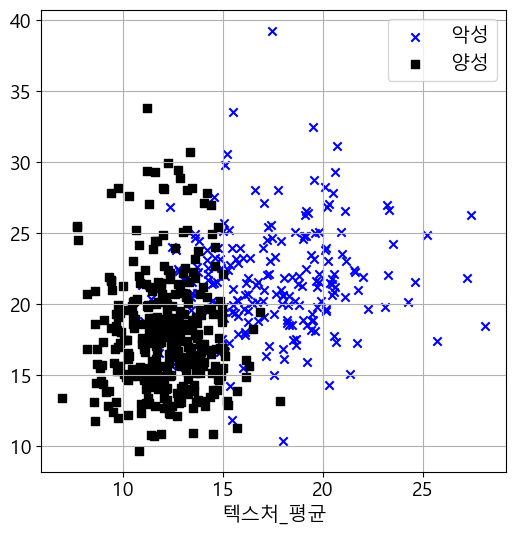

In [9]:
# 그래프 크기 조정
plt.figure(figsize=(6, 6))

# 목적변수 값이 0인 데이터 산점도 그리기
plt.scatter(df0['반지름_평균'], df0['텍스처_평균'], marker='x', c='b', label='악성')



# 목적변수 값이 1인 데이터 산점도 그리기
plt.scatter(df1['반지름_평균'], df1['텍스처_평균'], marker='s', c='k', label='양성')

# 그리드 표시
plt.grid()


plt.xlabel("반지름_평균")
plt.xlabel("텍스처_평균")

plt.legend()

plt.show()

#### 데이터 전처리

In [10]:
# 입력 데이터 두 개 필드로 줄이기

input_columns = ['반지름_평균', '텍스처_평균']
x = df[input_columns]

display(x.head())

,반지름_평균,텍스처_평균
0,17.9900,10.3800
1,20.5700,17.7700
2,19.6900,21.2500
3,11.4200,20.3800
4,20.2900,14.3400


#### 데이터 분류

In [11]:
# 학습 데이터와 검증 데이터 분할
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=random_seed)

In [12]:
# 분할된 데이터 확인

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(398, 2)
(171, 2)
(398,)
(171,)


In [13]:
# 분할된 데이터 내용 확인

display(x_train.head())
display(x_test.head())
display(y_train.head())
display(y_test.head())

,반지름_평균,텍스처_평균
559,11.5100,23.9300
295,13.7700,13.2700
264,17.1900,22.0700
125,13.8500,17.2100
280,19.1600,26.6000


,반지름_평균,텍스처_평균
333,11.2500,14.7800
273,9.7420,15.6700
201,17.5400,19.3200
178,13.0100,22.2200
85,18.4600,18.5200


559    1
295    1
264    0
125    1
280    0
dtype: int32

333    1
273    1
201    0
178    1
85     0
dtype: int32

#### 알고리즘 선택

In [14]:
from sklearn.linear_model import LogisticRegression

algorithm = LogisticRegression(random_state=random_seed)

#### 학습

In [15]:
algorithm.fit(x_train, y_train)
print(algorithm.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 123, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


#### 예측

In [16]:
y_pred = algorithm.predict(x_test)
print(y_pred)

[1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1
 1 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1
 0 1 1 0 0 0 1 0 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 0 1 0 1 0 1 1 0
 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0 0 1]


#### 평가

In [17]:
# 정확도 계산

w = (y_test.values == y_pred)
correct = w.sum()

# 검증 데이터 전체 개수
N = len(w)

# 정확도 = (정답 수) / (검증 데이터 전체 건수)
score = correct / N  

# 결과 출력

print(f"정확도 : {score:04f}")

정확도 : 0.877193


In [18]:
score = algorithm.score(x_test, y_test)
print(f'score: {score:04f}')

score: 0.877193


#### 튜닝

In [19]:
# 모델의 정확도 개선하기

# 원래 있던 30개 필드를 모두 포함해 학습 데이터와 검증 데이터를 다시 만든다
x2_train, x2_test, y_train, y_test = train_test_split(df, y, 
    train_size=0.7, test_size=0.3, random_state=random_seed)

# 로지스틱 회귀 모델도 다시 만든다
algorithm2 = LogisticRegression(random_state=random_seed)

# 새로 만든 학습 데이터로 학습을 진행한다
algorithm2.fit(x2_train, y_train)

# 검증 데이터로 정확도를 확인한다
score2 = algorithm2.score(x2_test, y_test)
print(f'score: {score2:.04f}')

score: 0.9649


## 보충 - 결정경계 그리기

로지스틱 회귀의 내부 구현
로지스틱 회귀 모델은 내부적으로 다음과 같이 동작한다.

(1) 입력변수를 1차 함수에 입력해 실수값을 구한다.

(2) (1)에서 얻은 1차 함수의 함숫값을 시그모이드 함수에 입력해 확률값을 계산한다.

(3) 예측결과는 (2)에서 얻은 확률값이 0.5보다 크면 1, 작으면 0이 된다.

(1)에서 사용된 1차 함수의 기울기와 절편을 변수 coef_, intercept_로 구할 수 있다. 다음 코드는 이러한 성질을 이용해 내부변수 값을 사용한다.

그리고 이 모델은 다중분류를 위해 변수의 내부 변수를 저장할 수 있도록 했다. 그러므로 2차원 배열이 사용됐지만, 여기서는 이진분류를 적용하므로 첫 번째 요소([0])만이 사용된다.

#### 내부변수의 값에 접근하기


In [20]:
# 모델의 내부변수(절편, 계수)값 구하기

# x1, x2의 계수
w1 = algorithm.coef_[0][0]
w2 = algorithm.coef_[0][1]

# 절편
w0 = algorithm.intercept_[0]

# 값 확인하기
print(f'w0 = {w0:.4f}  w1 = {w1:.4f}  w2 = {w2:.4f}')

w0 = 19.6195  w1 = -1.0275  w2 = -0.2151


#### boundary 함수의 정의

위에서 얻은 w0, w1, w2의 값을 사용해 산포도에 결정경계를 그리는 boundary 함수를 정의할 수 있다. 함수의 구현과 이를 유도한 식을 다음 셀에 싣는다.

In [21]:
# 결정경계를 계산하는 함수

# 결정경계 계산 함수
# 0 = w0 + w1 * x + w2 * y를 y에 대해 풀면
# y = -(w0 + w1 * x)/ w2가 된다

def boundary(algorithm, x):
    w1 = algorithm.coef_[0][0]
    w2 = algorithm.coef_[0][1]
    w0 = algorithm.intercept_[0]
    y = -(w0 + w1 * x)/w2
    return y

#### 결정경계의 경곗값 계산하기


다음 코드는 위에서 정의한 boundary 함수를 사용해 결정경계를 구성하는 경곗값의 좌표를 구하는 코드다. 이와 함께, 데이터가 담긴 데이터프레임에서 최솟값과 최댓값을 구해 그래프를 더 보기 좋게 그린다.



In [22]:
# 결정경계의 경곗값 계산하기

# 결정경계의 x축 양끝 좌표값
x_range = np.array((df['반지름_평균'].min(), df['반지름_평균'].max()))

# 결정경계의 y축 양끝 좌표값
y_range = boundary(algorithm, x_range)

# y의 최솟값과 최댓값은 산포도의 점으로 결정한다
y_lim = (df['텍스처_평균'].min(), df['텍스처_평균'].max())

# 결과 확인
print('x축 양끝 좌표: ', x_range)
print('y축 양끝 좌표: ', y_range)
print('그래프의 y구간: ', y_lim)

x축 양끝 좌표:  [ 6.981 28.11 ]
y축 양끝 좌표:  [ 57.8637 -43.0655]
그래프의 y구간:  (9.71, 39.28)


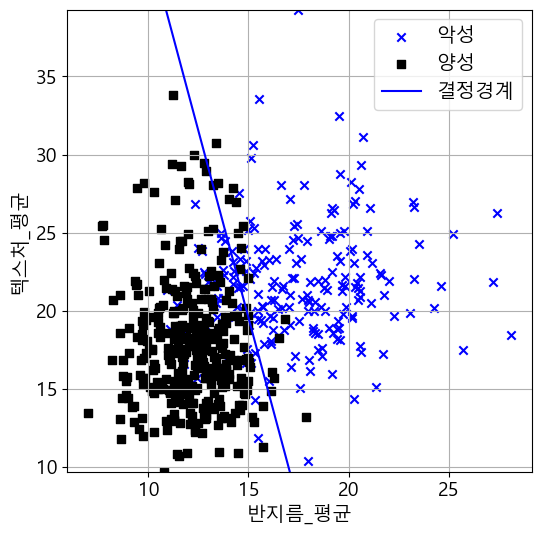

In [23]:
# 산포도와 결정경계 그리기

# 그래프 크기 정의
plt.figure(figsize=(6,6))

# 목적변수의 값이 0인 데이터의 산포도
plt.scatter(df0['반지름_평균'], df0['텍스처_평균'], marker='x', c='b', label='악성')

# 목적변수의 값이 1인 데이터의 산포도
plt.scatter(df1['반지름_평균'], df1['텍스처_평균'], marker='s', c='k', label='양성')

# 결정경계
plt.plot(x_range, y_range, c='b', label='결정경계')

# 범위 지정
plt.ylim(y_lim)

# 레이블 추가
plt.xlabel('반지름_평균')
plt.ylabel('텍스처_평균')

# 범례 표시
plt.legend()

# 그리드 표시
plt.grid()

# 그래프 화면 출력
plt.show()
 